In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
pip install tensorflow

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [8]:
df = pd.read_csv("agricultural_yield.csv")
df.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [9]:
x = df[['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare', 'Sunny_Days','Rainfall_mm', 'Irrigation_Schedule']].values
y= df['Yield_kg_per_hectare'].values

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size=0.2,random_state=42)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [14]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 527852.6875 - mae: 698.0311 - val_loss: 549255.3125 - val_mae: 714.5338
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 496431.7188 - mae: 676.7092 - val_loss: 441156.0625 - val_mae: 639.0051
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 358214.7812 - mae: 571.7717 - val_loss: 211119.5000 - val_mae: 440.3931
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 147182.7656 - mae: 360.3943 - val_loss: 40836.8516 - val_mae: 181.5304
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27487.0820 - mae: 141.7214 - val_loss: 11894.2197 - val_mae: 86.3695
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10786.9678 - mae: 81.4837 - val_loss: 9540.9736 - val_mae: 77.5481
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9583.9746 - mae: 78.1774 - val_loss: 8640.1699 - val_mae: 73.6893
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8673.9844 - mae: 73.5174 - val_loss: 8047.1079 

In [15]:
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2809.6003 - mae: 42.9301 
Test Mean Absolute Error: 40.93


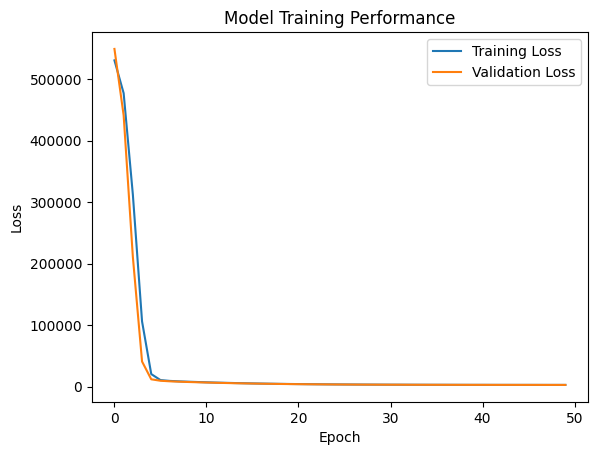

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,173 (59.27 KB)

 Trainable params: 5,057 (19.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,116 (39.52 KB)

In [18]:
y_pred = model.predict(x_test)
y_pred

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[ 448.3853 ],
       [ 672.493  ],
       [1085.1063 ],
       [ 683.49457],
       [ 821.5368 ],
       [1005.8282 ],
       [ 315.1166 ],
       [ 584.43945],
       [ 441.67673],
       [ 801.1895 ],
       [ 610.34314],
       [ 685.58167],
       [ 641.6342 ],
       [ 742.5443 ],
       [ 844.3014 ],
       [ 681.47754],
       [ 976.7533 ],
       [ 476.37766],
       [ 581.67566],
       [ 370.04758],
       [ 788.4739 ],
       [ 806.79675],
       [ 371.7071 ],
       [ 832.6001 ],
       [1021.6074 ],
       [ 585.72815],
       [ 651.4535 ],
       [ 970.1749 ],
       [ 618.5411 ],
       [ 630.4546 ],
       [ 682.12317],
       [ 798.5295 ],
       [ 827.6408 ],
       [ 795.44147],
       [ 522.33813],
       [ 712.8767 ],
       [ 712.84937],
       [1026.978  ],
       [ 233.80103],
       [ 648.9239 ],
       [ 936.45795],
       [ 903.57526],
       [ 780.1558 ],
       [ 760.8022 ],
       [ 620.73126],
       [ 835.93896],
       [ 626.7899 ],
       [ 586.

In [19]:
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2809.6003 - mae: 42.9301
Test Mean Absolute Error: 40.93


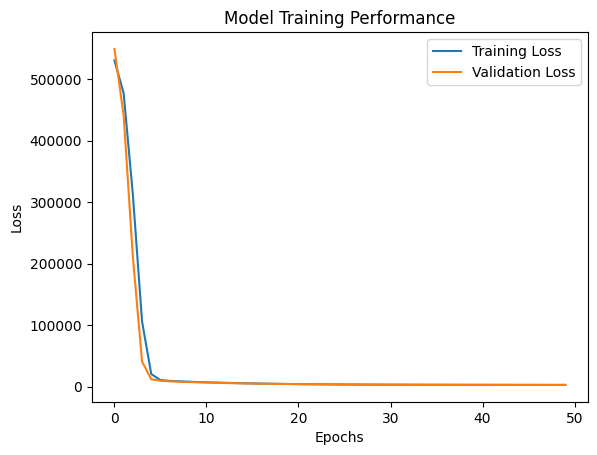

In [20]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [21]:
y_pred = model.predict(x_test)
y_pred

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[ 448.3853 ],
       [ 672.493  ],
       [1085.1063 ],
       [ 683.49457],
       [ 821.5368 ],
       [1005.8282 ],
       [ 315.1166 ],
       [ 584.43945],
       [ 441.67673],
       [ 801.1895 ],
       [ 610.34314],
       [ 685.58167],
       [ 641.6342 ],
       [ 742.5443 ],
       [ 844.3014 ],
       [ 681.47754],
       [ 976.7533 ],
       [ 476.37766],
       [ 581.67566],
       [ 370.04758],
       [ 788.4739 ],
       [ 806.79675],
       [ 371.7071 ],
       [ 832.6001 ],
       [1021.6074 ],
       [ 585.72815],
       [ 651.4535 ],
       [ 970.1749 ],
       [ 618.5411 ],
       [ 630.4546 ],
       [ 682.12317],
       [ 798.5295 ],
       [ 827.6408 ],
       [ 795.44147],
       [ 522.33813],
       [ 712.8767 ],
       [ 712.84937],
       [1026.978  ],
       [ 233.80103],
       [ 648.9239 ],
       [ 936.45795],
       [ 903.57526],
       [ 780.1558 ],
       [ 760.8022 ],
       [ 620.73126],
       [ 835.93896],
       [ 626.7899 ],
       [ 586.

<ipython-input-27-f8ef268e4fc8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
<ipython-input-27-f8ef268e4fc8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


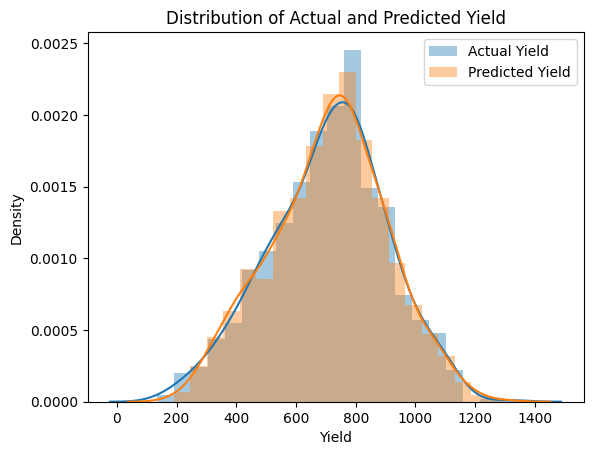

In [27]:


# Distribution plots
!pip install seaborn
import seaborn as sns
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

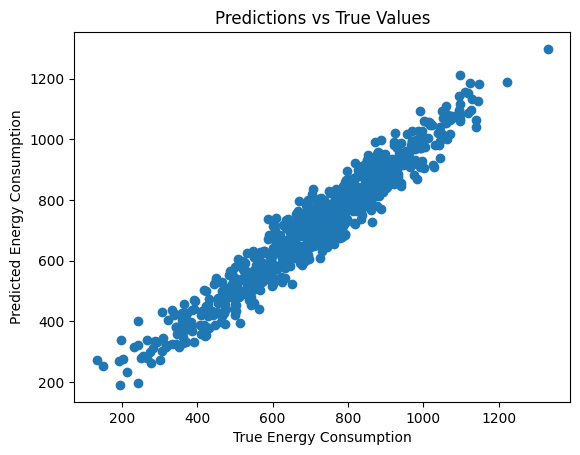

In [28]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Predictions vs True Values")
plt.show()
